### Limpieza: 
NBA Player Injury Stats (1951-2023)

# Limpieza inicial del dataset de lesiones NBA 
(1951-2023)

En esta sección vamos a:
1. Importar las librerías necesarias.
2. Leer el archivo CSV con los datos de lesiones.
3. Visualizar las primeras filas para entender la estructura.


In [1]:
# Importar librerías
import pandas as pd
import numpy as np

# Definir la ruta del archivo
file_path = r"C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data\NBA Player Injury Stats(1951 - 2023).csv"

# Leer el dataset
df_injuries = pd.read_csv(file_path)

# Mostrar información básica
print("Dimensiones:", df_injuries.shape)
df_injuries.head()


Dimensiones: (37667, 6)


,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
0,0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL
1,1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle
2,2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list
3,3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...
4,4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty


In [5]:
# Mostrar las primeras 20 filas
df_injuries.head(20)


,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
0,0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL
1,1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle
2,2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list
3,3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...
4,4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty
5,5,1962-03-24,Lakers,Elgin Baylor,NaN,player given 2-day pass from military duty
6,6,1962-03-31,Lakers,Elgin Baylor,NaN,player given weekend pass from military duty
7,7,1962-10-25,Zephyrs,NaN,Al Ferrari,placed on disabled list
8,8,1962-11-06,Zephyrs,Al Ferrari,NaN,activated from disabled list
9,9,1962-11-14,Zephyrs,NaN,Al Ferrari,placed on disabled list with knee injury


In [6]:
# Información general del DataFrame
df_injuries.info()

# Estadísticas descriptivas
df_injuries.describe(include="all")

# Conteo de nulos por columna
df_injuries.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37667 entries, 0 to 37666
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37667 non-null  int64 
 1   Date          37667 non-null  object
 2   Team          37667 non-null  object
 3   Acquired      17623 non-null  object
 4   Relinquished  20044 non-null  object
 5   Notes         37667 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.7+ MB


Unnamed: 0          0
Date                0
Team                0
Acquired        20044
Relinquished    17623
Notes               0
dtype: int64

In [3]:
# Estadísticas descriptivas
df_injuries.describe(include="all")

# Conteo de nulos
nulos_abs = df_injuries.isnull().sum()

# Porcentaje de nulos
nulos_pct = (nulos_abs / len(df_injuries)) * 100

# Unir en una tabla resumen
nulos_df = pd.DataFrame({
    "nulos": nulos_abs,
    "porcentaje": nulos_pct.round(2)
})

nulos_df


,nulos,porcentaje
Unnamed: 0,0,0.00
Date,0,0.00
Team,0,0.00
Acquired,20044,53.21
Relinquished,17623,46.79
Notes,0,0.00


In [7]:
# Convertir fecha a datatime

df_injuries["Date"] = pd.to_datetime(df_injuries["Date"], errors="coerce")



In [8]:
# Crear columna con el nombre del jugador limpio
df_injuries["name_clean"] = (
    df_injuries["Acquired"].fillna(df_injuries["Relinquished"])
    .str.strip()
    .str.title()
)

# Crear columna de estado
df_injuries["Status"] = np.where(
    df_injuries["Acquired"].notnull(), "Acquired", "Relinquished"
)


In [9]:
df_injuries[["Date", "Team", "name_clean", "Status", "Notes"]].head(10)


,Date,Team,name_clean,Status,Notes
0,1951-12-25,Bullets,Don Barksdale,Relinquished,placed on IL
1,1952-12-26,Knicks,Max Zaslofsky,Relinquished,placed on IL with torn side muscle
2,1956-12-29,Knicks,Jim Baechtold,Relinquished,placed on inactive list
3,1959-01-16,Lakers,Elgin Baylor,Relinquished,player refused to play after being denied a ro...
4,1961-11-26,Lakers,Elgin Baylor,Relinquished,player reported for military duty
5,1962-03-24,Lakers,Elgin Baylor,Acquired,player given 2-day pass from military duty
6,1962-03-31,Lakers,Elgin Baylor,Acquired,player given weekend pass from military duty
7,1962-10-25,Zephyrs,Al Ferrari,Relinquished,placed on disabled list
8,1962-11-06,Zephyrs,Al Ferrari,Acquired,activated from disabled list
9,1962-11-14,Zephyrs,Al Ferrari,Relinquished,placed on disabled list with knee injury


In [11]:
# Eliminar índice redundante
df_injuries.drop(columns=["Unnamed: 0"], inplace=True)

# Limpiar name_clean
df_injuries["name_clean"] = (
    df_injuries["name_clean"]
    .str.strip()                           # elimina espacios al inicio y final
    .str.replace("-", " ", regex=False)    # reemplaza guiones por espacios
    .str.replace("  ", " ", regex=False)   # evita dobles espacios
    .str.title()                           # deja el formato "Nombre Apellido"
)

# 3. Verificar primeros nombres
df_injuries[["name_clean"]].head(20)


,name_clean
0,Don Barksdale
1,Max Zaslofsky
2,Jim Baechtold
3,Elgin Baylor
4,Elgin Baylor
5,Elgin Baylor
6,Elgin Baylor
7,Al Ferrari
8,Al Ferrari
9,Al Ferrari


In [12]:
# Nos quedamos solo con el primer nombre antes del "/"
df_injuries["name_clean"] = df_injuries["name_clean"].str.split("/").str[0].str.strip()


In [13]:
# Contar ocurrencias de cada jugador
jugadores_count = df_injuries["name_clean"].value_counts()

# Ver los 20 jugadores con más registros
jugadores_count.head(20)



name_clean
Kawhi Leonard            101
Andre Iguodala            99
(William) Tony Parker     99
Emanuel Ginobili          96
Kyrie Irving              95
Dwyane Wade               93
Eric Gordon               88
Jimmy Butler              88
Al Horford                84
Lebron James              83
Derrick Rose              80
Kyle Lowry                79
Joel Embiid               78
Giannis Antetokounmpo     76
Patrick Beverley          76
C.J. Miles                75
Jermaine O'Neal           75
Devin Harris              75
Tyson Chandler            73
Danilo Gallinari          72
Name: count, dtype: int64

In [14]:
# Reemplazar paréntesis y limpiar espacios
df_injuries["name_clean"] = (
    df_injuries["name_clean"]
    .str.replace(r"\(.*?\)", "", regex=True)  # quita lo que esté entre ()
    .str.strip()
)


In [15]:
# Filtrar solo los que fueron dados de baja
lesionados = df_injuries[df_injuries["Status"] == "Relinquished"]

# Contar jugadores únicos con al menos una lesión
jugadores_lesionados_unicos = lesionados["name_clean"].nunique()
print("Cantidad de jugadores con lesiones:", jugadores_lesionados_unicos)

# Listado de jugadores (ejemplo: primeros 20)
jugadores_lesionados = lesionados["name_clean"].unique()
print("Ejemplo de jugadores lesionados:", jugadores_lesionados[:20])


Cantidad de jugadores con lesiones: 2712
Ejemplo de jugadores lesionados: ['Don Barksdale' 'Max Zaslofsky' 'Jim Baechtold' 'Elgin Baylor'
 'Al Ferrari' 'Terry Dischinger' 'Bob Greacen' 'John Arthurs'
 'Guy Rodgers' 'Jim Welch' 'Bobby Washington' 'Rick Roberson'
 'Merv Jackson' 'Randy Denton' 'John Green' "Mike D'Antoni" 'Lucius Allen'
 'Kareem Abdul Jabbar' 'Dick Cunningham' 'Melvin Davis']


## Exploración de `Notes`

- Se revisaron las frases más comunes en la columna `Notes`.  
- Se contaron las palabras más frecuentes para detectar términos clave (ej: knee, ankle, back, surgery, illness).  
- Se vieron ejemplos de `Notes` según el `Status` (Relinquished = bajas/lesiones, Acquired = altas).  

Esto sirvió para entender el texto y definir las categorías de lesión.  


In [16]:
from collections import Counter
import re

# 1. Frases más comunes en Notes
print("Frases más comunes en Notes:")
print(df_injuries["Notes"].value_counts().head(30))

# 2. Palabras más frecuentes en todas las Notes
all_notes = " ".join(df_injuries["Notes"].dropna().str.lower())
words = re.findall(r"[a-z]+", all_notes)
word_freq = Counter(words).most_common(50)

print("\nPalabras más frecuentes en Notes:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

# 3. Ejemplos de notas por Status
print("\nEjemplos de Notes para jugadores Relinquished (lesionados/baja):")
print(df_injuries[df_injuries["Status"] == "Relinquished"]["Notes"].head(10).tolist())

print("\nEjemplos de Notes para jugadores Acquired (alta/incorporación):")
print(df_injuries[df_injuries["Status"] == "Acquired"]["Notes"].head(10).tolist())


Frases más comunes en Notes:
Notes
activated from IL                                    17434
placed on IL                                          6331
placed on IL with sprained left ankle                  616
placed on IL with sprained right ankle                 574
placed on IL with NBA health and safety protocols      522
placed on IL with illness                              502
placed on IL with sore left knee                       291
placed on IL with sore right knee                      272
placed on IL with back spasms                          244
placed on IL for rest                                  215
placed on IL with strained lower back                  175
placed on IL with concussion                           156
placed on IL with flu                                  150
placed on IL with left knee injury                     145
placed on IL with sore lower back                      139
placed on IL with left knee tendinitis                 130
placed on IL with rig

## Creación de `InjuryCategory`

- Se revisaron las columnas del DataFrame.  
- Si no existía, se creó la columna `InjuryCategory` a partir de `Notes` usando la función `simplify_injury()`.  
- Esta función clasifica las notas en categorías como: Knee, Ankle/Foot, Back, Muscular, Arm/Hand, Illness, Surgery, Head, Other o Unknown.  
- Finalmente, se contó cuántos registros hay en cada categoría con `.value_counts()`.  

Ahora cada evento tiene una categoría clara y lista para análisis.  


In [23]:
# 1. Ver columnas actuales
print("Columnas del DataFrame:")
print(df_injuries.columns)

# 2. Crear columna InjuryCategory si no existe
if "InjuryCategory" not in df_injuries.columns:
    def simplify_injury(note):
        note = str(note).lower()

        if "knee" in note:
            return "Knee"
        elif "ankle" in note or "foot" in note or "toe" in note or "achilles" in note:
            return "Ankle/Foot"
        elif "back" in note or "hip" in note or "spine" in note:
            return "Back"
        elif "shoulder" in note or "wrist" in note or "hand" in note or "elbow" in note or "finger" in note or "thumb" in note:
            return "Arm/Hand"
        elif "concussion" in note or "head" in note:
            return "Head"
        elif "hamstring" in note or "groin" in note or "muscle" in note or "calf" in note or "strain" in note or "quad" in note:
            return "Muscular"
        elif "surgery" in note or "repair" in note or "operation" in note:
            return "Surgery"
        elif "illness" in note or "flu" in note or "covid" in note or "protocols" in note:
            return "Illness"
        elif "rest" in note or "suspension" in note or "military" in note:
            return "Other"
        else:
            return "Unknown"

    df_injuries["InjuryCategory"] = df_injuries["Notes"].apply(simplify_injury)
    print("Columna InjuryCategory creada")

# 3. Conteo de categorías
conteo_categorias = df_injuries["InjuryCategory"].value_counts()
print("\nConteo de categorías de lesiones:")
print(conteo_categorias)


Columnas del DataFrame:
Index(['Date', 'Team', 'Acquired', 'Relinquished', 'Notes', 'name_clean',
       'Status', 'InjuryCategory'],
      dtype='object')

Conteo de categorías de lesiones:
InjuryCategory
Unknown       25338
Ankle/Foot     3169
Knee           2711
Muscular       1689
Back           1537
Arm/Hand       1414
Illness        1297
Other           244
Head            213
Surgery          55
Name: count, dtype: int64


Interpretación rápida

Unknown (25.338) → la mayoría de registros no tienen suficiente detalle en Notes (ej. "placed on IL" o "activated from IL" sin especificar la causa).

Ankle/Foot (3.169) y Knee (2.711) → son las lesiones más comunes cuando sí se especifica.

Muscular (1.689) → tirones, hamstring, calf, groin.

Back (1.537) → problemas lumbares, espasmos.

Arm/Hand (1.414) → hombro, muñeca, dedos.

Illness (1.297) → gripe, protocolos, covid.

Head (213) → conmociones cerebrales.

Surgery (55) → muy pocas veces aparece explícito en Notes.

In [24]:
# Borrar columnas redundantes
df_injuries.drop(columns=["Acquired", "Relinquished", "Notes"], inplace=True)

# Verificar columnas finales
print(df_injuries.columns)


Index(['Date', 'Team', 'name_clean', 'Status', 'InjuryCategory'], dtype='object')


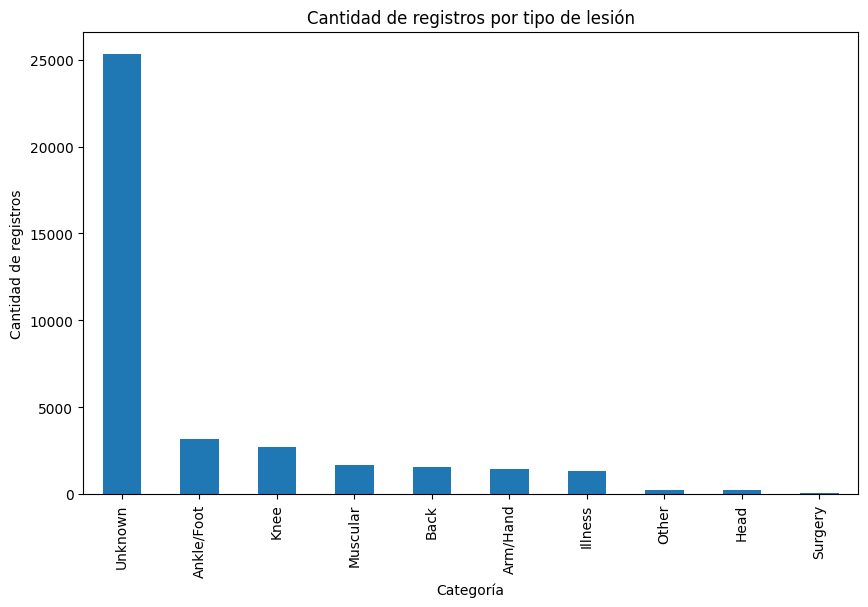

In [25]:
conteo_categorias.plot(
    kind="bar", figsize=(10,6), title="Cantidad de registros por tipo de lesión"
)
plt.xlabel("Categoría")
plt.ylabel("Cantidad de registros")
plt.show()


## Eliminación de registros con categoría `Unknown`

En el paso anterior filtramos el dataset para quedarnos solo con las **lesiones reales**, descartando los registros clasificados como `Unknown`.  


In [26]:
lesiones_reales = df_injuries[df_injuries["InjuryCategory"] != "Unknown"]
lesiones_reales["InjuryCategory"].value_counts()


InjuryCategory
Ankle/Foot    3169
Knee          2711
Muscular      1689
Back          1537
Arm/Hand      1414
Illness       1297
Other          244
Head           213
Surgery         55
Name: count, dtype: int64

In [27]:
# Filtrados (lesiones reales)
print("Cantidad de registros con lesiones reales:", len(lesiones_reales))

# Originales
print("Cantidad de registros originales:", len(df_injuries))

# Diferencia
print("Registros eliminados (Unknown):", len(df_injuries) - len(lesiones_reales))


Cantidad de registros con lesiones reales: 12329
Cantidad de registros originales: 37667
Registros eliminados (Unknown): 25338


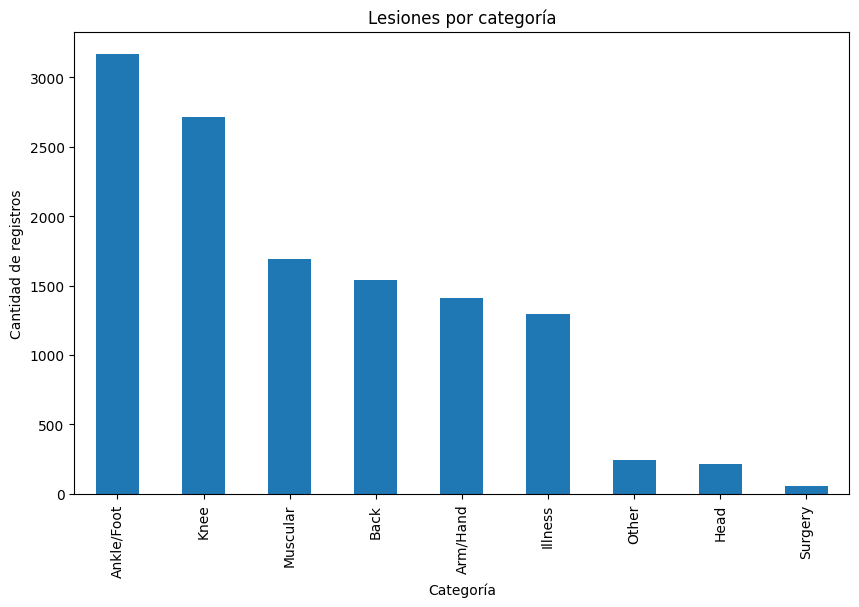

In [31]:
## 📊 Análisis 1: Distribución de lesiones por categoría

## Objetivo: identificar qué tipos de lesiones son más frecuentes en la NBA.


conteo_categorias = lesiones_reales["InjuryCategory"].value_counts()
conteo_categorias.plot(kind="bar", figsize=(10,6), title="Lesiones por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de registros")
plt.show()


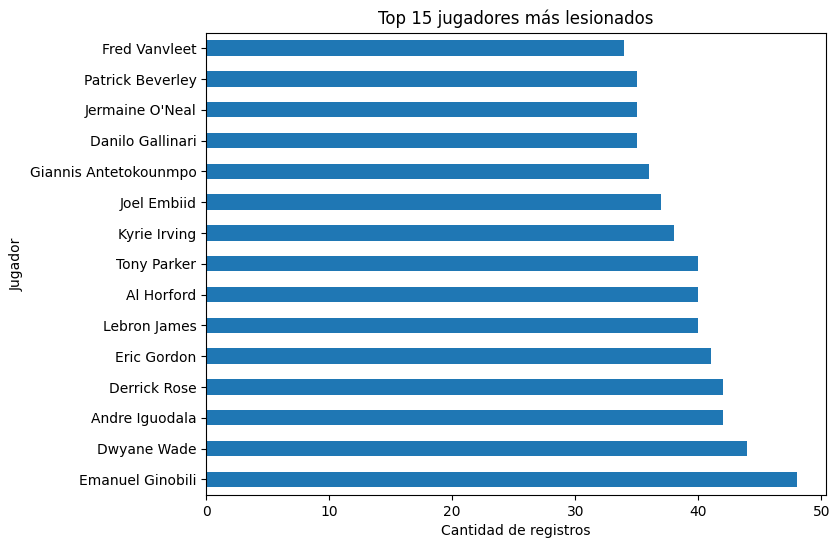

In [32]:
## Jugadores con más registros de lesiones

## Objetivo: Identificar a los jugadores con mayor cantidad de lesiones registradas.


top_jugadores = lesiones_reales["name_clean"].value_counts().head(15)
top_jugadores.plot(kind="barh", figsize=(8,6), title="Top 15 jugadores más lesionados")
plt.xlabel("Cantidad de registros")
plt.ylabel("Jugador")
plt.show()


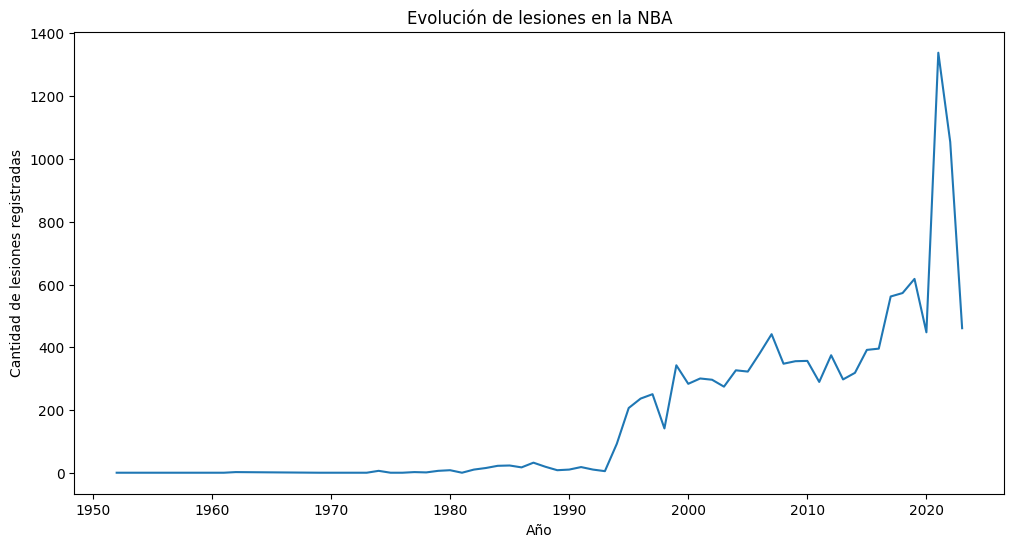

In [33]:
## Evolución de lesiones por año

## Objetivo: Analizar cómo ha cambiado la frecuencia de lesiones a lo largo del tiempo en la NBA.


lesiones_por_anio = (
    lesiones_reales.groupby(lesiones_reales["Date"].dt.year)["InjuryCategory"]
    .count()
)

lesiones_por_anio.plot(figsize=(12,6), title="Evolución de lesiones en la NBA")
plt.xlabel("Año")
plt.ylabel("Cantidad de lesiones registradas")
plt.show()


## Cierre del proceso de limpieza

- Se cargó y exploró el dataset original de lesiones NBA (1951–2023).  
- Se normalizó la columna de nombres (`name_clean`) para unificar jugadores.  
- Se creó la columna **`Status`** (alta/baja) a partir de `Acquired` y `Relinquished`.  
- Se clasificaron las notas (`Notes`) en categorías resumidas mediante la columna **`InjuryCategory`**.  
- Se eliminaron columnas redundantes (`Acquired`, `Relinquished`, `Notes`).  
- Se filtraron los registros **Unknown**, quedando solo las **lesiones reales clasificadas**.  
- Se verificó la cantidad final de datos y el porcentaje útil respecto del dataset original.  

El dataset ahora está limpio, estructurado y listo para realizar análisis exploratorios y cruces con otros datos (ej. composición corporal, rendimiento, posiciones de juego).  


In [34]:
# Exportar dataset final 
lesiones_reales.to_csv(
    r"C:\Users\elian\OneDrive\Escritorio\NBA_ComposicionCorporal_Rendimiento\data_clean\nba_injuries_ready.csv",
    index=False,
    encoding="utf-8"
)

print("Archivo exportado como nba_injuries_ready.csv")


Archivo exportado como nba_injuries_ready.csv


In [35]:
# Verificar primeras filas y shape
print("\nPreview del dataset limpio:")
display(lesiones_reales.head())
print("\nShape final:", lesiones_reales.shape)


Preview del dataset limpio:


,Date,Team,name_clean,Status,InjuryCategory
1,1952-12-26,Knicks,Max Zaslofsky,Relinquished,Muscular
4,1961-11-26,Lakers,Elgin Baylor,Relinquished,Other
5,1962-03-24,Lakers,Elgin Baylor,Acquired,Other
6,1962-03-31,Lakers,Elgin Baylor,Acquired,Other
9,1962-11-14,Zephyrs,Al Ferrari,Relinquished,Knee



Shape final: (12329, 5)
